## Importing the libraries
ask them to import and check "tf.\_\_version\_\_"

print("Hello world")

> Indented block



In [ ]:
print("Hello world")

Hello world


In [ ]:
import numpy as np
import matplotlib.pyplot as plt ## not really necessary
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

##Data Processing

In [ ]:
 ## side bar 
 ## click floder to enable runtime
 ## click first button to upload csv from local 

dataset = pd.read_csv('bank-demo-data.csv') ## side bar 


## creating matrix feature x, 
#x = dataset.iloc[:, :-1].values


The data is read by panda, so it can use iloc function to read data and trim data

what iloc does
iloc [rows,start_col,end_col];

There's also loc, 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html


dataframe atributes example:

Attributes

at

Access a single value for a row/column label pair.

attrs

Dictionary of global attributes of this dataset.

axes

Return a list representing the axes of the DataFrame.

columns

The column labels of the DataFrame.

dtypes

Return the dtypes in the DataFrame.

empty

Indicator whether DataFrame is empty.

flags

Get the properties associated with this pandas object.

iat

Access a single value for a row/column pair by integer position.

iloc

Purely integer-location based indexing for selection by position.

index

The index (row labels) of the DataFrame.

loc

Access a group of rows and columns by label(s) or a boolean array.

ndim

Return an int representing the number of axes / array dimensions.

shape

Return a tuple representing the dimensionality of the DataFrame.

size

Return an int representing the number of elements in this object.

style

Returns a Styler object.

values

Return a Numpy representation of the DataFrame.



In [ ]:
## start at D, so ,
## rows, start_row, end_row 
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:,-1].values

print(X[0])

print(y)

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
[1 0 1 ... 1 1 0]


## Encoding categorical data

This is done to avoid any relationship order


Gender and Country

In [ ]:
## for python dude do
##pip install scikit-learn.
##conda install scikit-learn

from sklearn.preprocessing import LabelEncoder;
le = LabelEncoder()
## transforming all the rows, and index
X[:,2] = le.fit_transform(X[:, 2])


In [ ]:
print(X)
print(len(X[0]))

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
10


![image.png](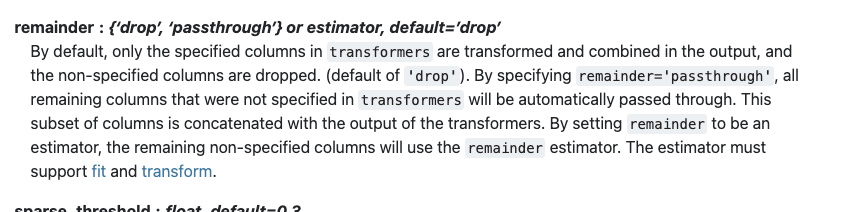)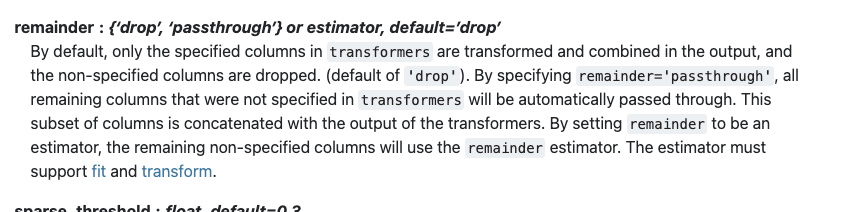

In [ ]:
# One Hot Encoding the "Geography"

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#[enocoder type, [onehotencoder, [1]]]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X));

In [ ]:
print(len(X[0]))
print(X[0])

12
[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


## Splitting the dataset into Training set and Test set


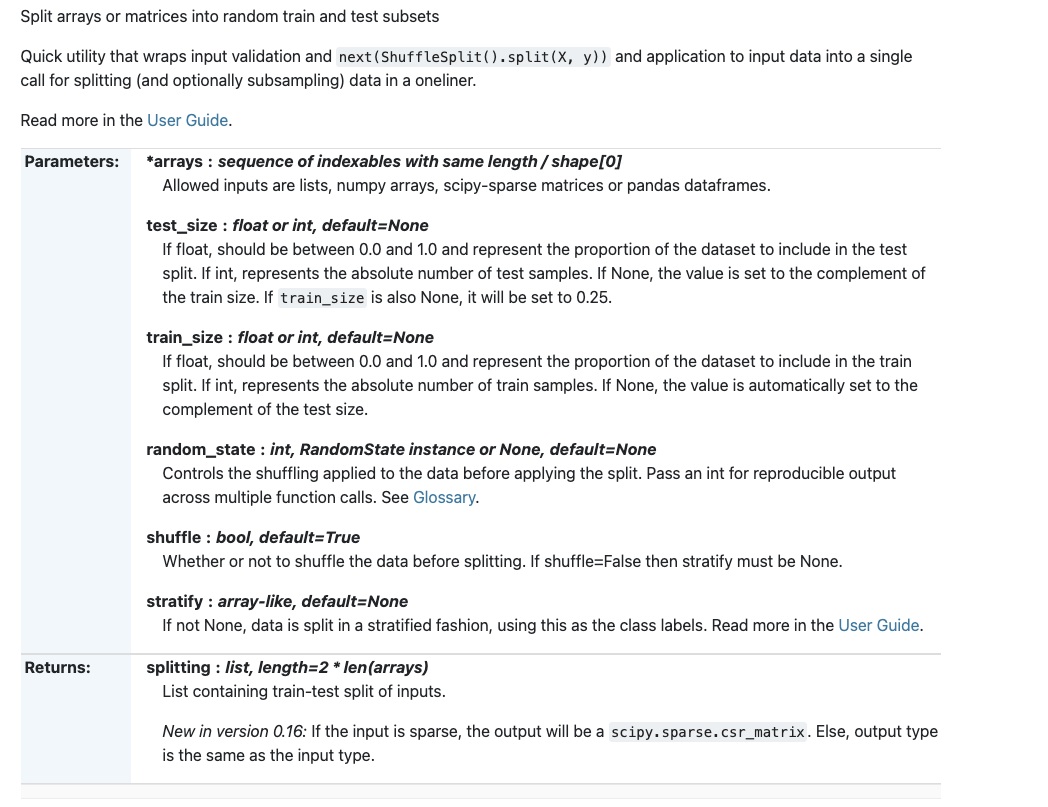

In [ ]:
from sklearn.model_selection import train_test_split
# test size = mean 20% test, 80% train
# random state is shuffle or not 
# 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0);

In [ ]:
print(X_train)

[[0.0 0.0 1 ... 1 0 163830.64]
 [0.0 1.0 0 ... 1 1 57098.0]
 [1.0 0.0 0 ... 1 0 185630.76]
 ...
 [1.0 0.0 0 ... 1 0 181429.87]
 [0.0 0.0 1 ... 1 1 148750.16]
 [0.0 1.0 0 ... 1 0 118855.26]]


## Feature Scalling

Must feature scale!!!!


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#2. Building the ANN

##Initializing the ANN

In [ ]:
## this is from tf.kerras 
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer


In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

##Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the onput layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#3. Training

## Compiling the ANN

Need some explaining

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy']);
## let tf to optimize the ann

##Training the ANN on Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 960us/step - loss: 0.3344 - accuracy: 0.8651
Epoch 2/100
250/250 [==============================] - 0s 983us/step - loss: 0.3347 - accuracy: 0.8649
Epoch 3/100
250/250 [==============================] - 0s 981us/step - loss: 0.3347 - accuracy: 0.8639
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8633
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8641
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8656
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8627
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8648
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8637
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - 

##Making predictions and evaluting model

In [ ]:
## the predict method aways take 2d array, even if you 
test = [1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000] # must call sacaling

apple = sc.transform([test])
print(ann.predict(apple));

[[0.03730232]]


## Evaluation 

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred> 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

##[[1511   84]
 ##[ 194  211]]
##0.861

[[1511   84]
 [ 194  211]]


0.861

#Save and Load